# eggNOG EDA
Exploring VOGs from [eggNOG](http://eggnog5.embl.de/download/eggnog_5.0/per_tax_level/10239/). Unfortunately eggNOG 5.0 has no README.txt describing the files, so I looked into the [eggNOG 4.5 README.txt](http://eggnog5.embl.de/download/eggnog_4.5/README.txt) to get info on the files.


In [1]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Load and view eggNOG files
* **10239_members.tsv**, Tab delimited file, content of each group (protein list).
* **10239_annotations.tsv**, Tab delimited file, functional annotation associated with each group.
* **10239_trees.tsv**, Tab delimited file, phylogenetic tree of each group in newick format.

In [2]:
# Path to VOGDB files
eggnog_files = '/home/alepfu/Desktop/eggNOG_Viruses_files/'

# Filenames
eggnog_file_members = '10239_members.tsv'
eggnog_file_annotations = '10239_annotations.tsv'
eggnog_file_trees = '10239_trees.tsv'

# eggNOG files come without headers
members_header = ['TaxonomicLevel','GroupName','ProteinCount','SpeciesCount','COGFunctionalCategory','ProteinIDs']
annotations_header = ['TaxonomicLevel','GroupName','COGFunctionalCategory','ConsensusFunctionalDescription']
trees_header = ['TaxonomicLevel','GroupName','SequenceAlignmentMethod','NewickTree']

# Load data
eggnog_members_df = pd.read_csv(eggnog_files + eggnog_file_members, sep='\t', names=members_header)
eggnog_annotations_df = pd.read_csv(eggnog_files + eggnog_file_annotations, sep='\t', names=annotations_header)
eggnog_trees_df = pd.read_csv(eggnog_files + eggnog_file_trees, sep='\t', names=trees_header)

In [3]:
n_vogs = eggnog_members_df.shape[0]
print('Number of VOGs:', n_vogs)

Number of VOGs: 8319


## eggNOG members

In [4]:
eggnog_members_df.head()

,TaxonomicLevel,GroupName,ProteinCount,SpeciesCount,COGFunctionalCategory,ProteinIDs
0,10239,4QAIH,2,2,"1229753.K7QJT8_9CAUD,948870.I7HXC4_9CAUD","1229753,948870"
1,10239,4QAII,2,2,"1337877.R9VYA7_9CAUD,1589751.A0A0C5AES7_9CAUD","1337877,1589751"
2,10239,4QAIJ,92,87,"1026955.F5B418_9CAUD,1036615.G1DU48_9CAUD,1036...","1026955,1036615,1036616,10506,10678,10689,1073..."
3,10239,4QAIK,394,271,"1026955.F5B3S2_9CAUD,1026955.F5B490_9CAUD,1032...","1026955,1032891,1036613,1041808,1048207,105267..."
4,10239,4QAIM,2,2,"1204516.I6XLJ7_9CAUD,260149.E5DSM2_9CAUD","1204516,260149"


We drop column "COGFunctionalCategory", because it doesn't hold the right information. It should be a single letter, but it's a list of IDs (Taxid.SeqID). 
Also, we drop the column "TaxonomicLevel", since this is the level-ID of viruses, and there are only viruses in VOGs.

In [5]:
eggnog_members_df.drop(['COGFunctionalCategory', 'TaxonomicLevel'], axis=1, inplace=True)
eggnog_members_df.head()

,GroupName,ProteinCount,SpeciesCount,ProteinIDs
0,4QAIH,2,2,"1229753,948870"
1,4QAII,2,2,"1337877,1589751"
2,4QAIJ,92,87,"1026955,1036615,1036616,10506,10678,10689,1073..."
3,4QAIK,394,271,"1026955,1032891,1036613,1041808,1048207,105267..."
4,4QAIM,2,2,"1204516,260149"


In [6]:
print('Number of NaN cells:', eggnog_members_df.isna().sum().sum())

Number of NaN cells: 0


In [7]:
eggnog_members_df[['ProteinCount','SpeciesCount']].describe()

,ProteinCount,SpeciesCount
count,8319.000000,8319.000000
mean,6.578916,6.084385
std,27.962616,18.498776
min,2.000000,2.000000
25%,2.000000,2.000000
50%,2.000000,2.000000
75%,4.000000,4.000000
max,1855.000000,837.000000


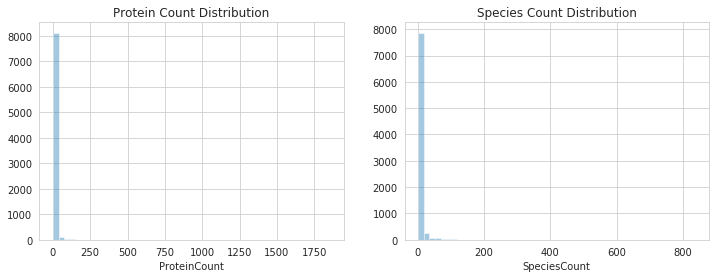

In [8]:
fig = plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
ax = sns.distplot(eggnog_members_df['ProteinCount'], kde=False)
plt.title('Protein Count Distribution')

plt.subplot(1, 2, 2)
ax = sns.distplot(eggnog_members_df['SpeciesCount'], kde=False)
plt.title('Species Count Distribution')

plt.show()

<span style="color:darkgreen;font-weight:bold;">
Most groups are small. Compared to VOGDB, groups are only half the size.
</span>

## Top 1% eggNOG members

Exploring the top 1% of VOGs having the most proteins or species.

In [9]:
n_top_vogs = int(n_vogs / 100)
print('Number of top 1% of VOGs:', n_top_vogs)

Number of top 1% of VOGs: 83


In [10]:
eggnog_top_proteins_members_df = eggnog_members_df.sort_values('ProteinCount', ascending=False).head(n_top_vogs)
eggnog_top_proteins_members_df[['ProteinCount']].describe()

,ProteinCount
count,83.000000
mean,170.939759
std,213.369389
min,69.000000
25%,84.500000
50%,112.000000
75%,170.000000
max,1855.000000


In [11]:
eggnog_top_species_members_df = eggnog_members_df.sort_values('SpeciesCount', ascending=False).head(n_top_vogs)
eggnog_top_species_members_df[['SpeciesCount']].describe()

,SpeciesCount
count,83.000000
mean,136.457831
std,109.309284
min,64.000000
25%,74.000000
50%,102.000000
75%,150.000000
max,837.000000


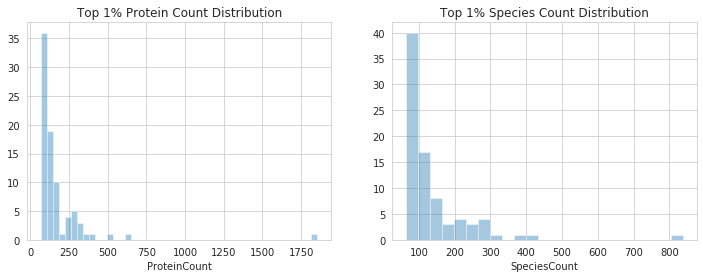

In [12]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
ax = sns.distplot(eggnog_top_proteins_members_df['ProteinCount'], kde=False)
plt.title('Top 1% Protein Count Distribution')

plt.subplot(1, 2, 2)
ax = sns.distplot(eggnog_top_species_members_df['SpeciesCount'], kde=False)
plt.title('Top 1% Species Count Distribution')

plt.show()

<span style="color:darkgreen;font-weight:bold;">
Larger groups are also only half the size, when compared to VOGDB.
</span>

## eggNOG annotations

In [13]:
eggnog_annotations_df.head()

,TaxonomicLevel,GroupName,COGFunctionalCategory,ConsensusFunctionalDescription
0,10239,4QAIH,S,NaN
1,10239,4QAII,S,NaN
2,10239,4QAIJ,S,C-5 cytosine-specific DNA methylase
3,10239,4QAIK,S,bis(5'-nucleosyl)-tetraphosphatase (symmetrica...
4,10239,4QAIM,S,NaN


In [14]:
print('Number of NaN cells:', eggnog_annotations_df.isna().sum().sum())

Number of NaN cells: 6505


In [15]:
print('NaN columns:', eggnog_annotations_df.columns[eggnog_annotations_df.isna().any()].tolist())

NaN columns: ['ConsensusFunctionalDescription']


We drop the column "TaxonomicLevel", since this is the level-ID of viruses, and there are only viruses in VOGs.

In [16]:
eggnog_annotations_df.drop(['TaxonomicLevel'], axis=1, inplace=True)
eggnog_annotations_df.head()

,GroupName,COGFunctionalCategory,ConsensusFunctionalDescription
0,4QAIH,S,NaN
1,4QAII,S,NaN
2,4QAIJ,S,C-5 cytosine-specific DNA methylase
3,4QAIK,S,bis(5'-nucleosyl)-tetraphosphatase (symmetrica...
4,4QAIM,S,NaN


In [17]:
broad_cat = {'J': 'INFO', 'A': 'INFO', 'K': 'INFO', 'L': 'INFO', 'B': 'INFO', # INFORMATION STORAGE AND PROCESSING
             'D': 'CELL', 'Y': 'CELL', 'V': 'CELL', 'T': 'CELL', 'M': 'CELL', 'N': 'CELL', 'Z': 'CELL', 'W': 'CELL', 'U': 'CELL', 'O': 'CELL', # CELLULAR PROCESSES AND SIGNALING
             'C': 'META', 'G': 'META', 'E': 'META', 'F': 'META', 'H': 'META', 'I': 'META', 'P': 'META', 'Q': 'META', # METABOLISM
             'R': 'POOR', 'S': 'POOR'}   # POORLY CHARACTERIZED

eggnog_annotations_df['BroadFunctionalCategory'] = eggnog_annotations_df['COGFunctionalCategory'].map(broad_cat)
eggnog_annotations_df.head()

,GroupName,COGFunctionalCategory,ConsensusFunctionalDescription,BroadFunctionalCategory
0,4QAIH,S,NaN,POOR
1,4QAII,S,NaN,POOR
2,4QAIJ,S,C-5 cytosine-specific DNA methylase,POOR
3,4QAIK,S,bis(5'-nucleosyl)-tetraphosphatase (symmetrica...,POOR
4,4QAIM,S,NaN,POOR


In [18]:
eggnog_annotations_df['INFO'] = eggnog_annotations_df['BroadFunctionalCategory'].str.contains('INFO').astype(int)
eggnog_annotations_df['CELL'] = eggnog_annotations_df['BroadFunctionalCategory'].str.contains('CELL').astype(int)
eggnog_annotations_df['META'] = eggnog_annotations_df['BroadFunctionalCategory'].str.contains('META').astype(int)
eggnog_annotations_df['POOR'] = eggnog_annotations_df['BroadFunctionalCategory'].str.contains('POOR').astype(int)

In [19]:
eggnog_annotations_df.head()

,GroupName,COGFunctionalCategory,ConsensusFunctionalDescription,BroadFunctionalCategory,INFO,CELL,META,POOR
0,4QAIH,S,NaN,POOR,0,0,0,1
1,4QAII,S,NaN,POOR,0,0,0,1
2,4QAIJ,S,C-5 cytosine-specific DNA methylase,POOR,0,0,0,1
3,4QAIK,S,bis(5'-nucleosyl)-tetraphosphatase (symmetrica...,POOR,0,0,0,1
4,4QAIM,S,NaN,POOR,0,0,0,1


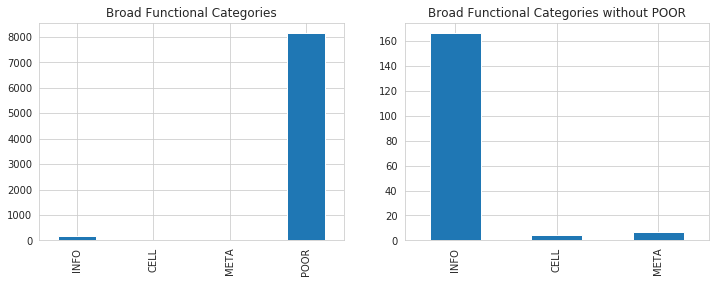

In [20]:
fig = plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
ax = eggnog_annotations_df[['INFO','CELL','META','POOR']].sum().plot.bar()
plt.title('Broad Functional Categories')

plt.subplot(1, 2, 2)
ax = eggnog_annotations_df[['INFO','CELL','META']].sum().plot.bar()
plt.title('Broad Functional Categories without POOR')

plt.show()

<span style="color:darkgreen;font-weight:bold;">
Most groups are poorly characterized.
</span>

## Top 1% eggNOG annotations

Exploring functional characterization for the top 1% of VOGs having the most proteins or species.

In [21]:
eggnog_merge_df = pd.merge(eggnog_members_df, eggnog_annotations_df, on='GroupName')
eggnog_merge_df.drop(['ProteinIDs','COGFunctionalCategory','ConsensusFunctionalDescription'], axis=1, inplace=True)

In [22]:
eggnog_top_proteins_merge_df = eggnog_merge_df.sort_values('ProteinCount', ascending=False).head(n_top_vogs)
eggnog_top_species_merge_df = eggnog_merge_df.sort_values('SpeciesCount', ascending=False).head(n_top_vogs)

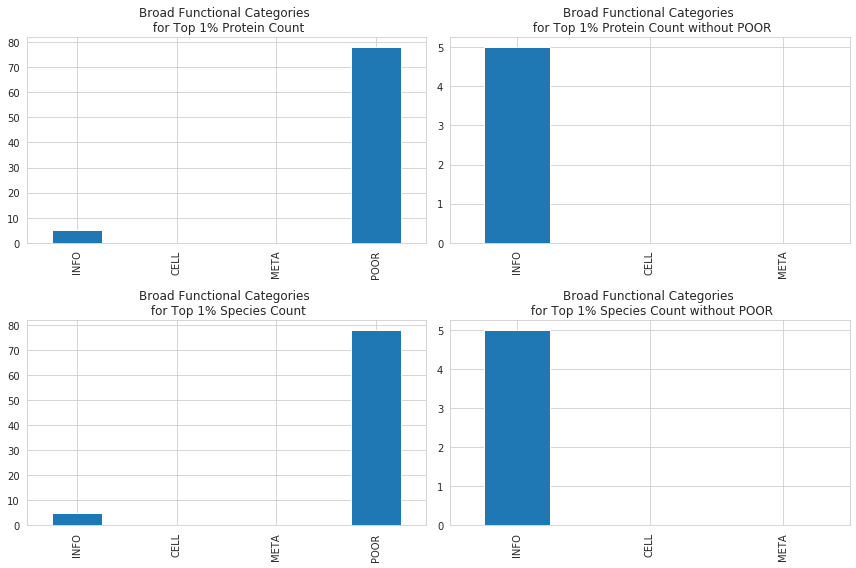

In [23]:
fig = plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
ax = eggnog_top_proteins_merge_df[['INFO','CELL','META','POOR']].sum().plot.bar()
plt.title('Broad Functional Categories \n for Top 1% Protein Count')

plt.subplot(2, 2, 2)
ax = eggnog_top_proteins_merge_df[['INFO','CELL','META']].sum().plot.bar()
plt.title('Broad Functional Categories \n for Top 1% Protein Count without POOR')

plt.subplot(2, 2, 3)
ax = eggnog_top_species_merge_df[['INFO','CELL','META','POOR']].sum().plot.bar()
plt.title('Broad Functional Categories \n for Top 1% Species Count')

plt.subplot(2, 2, 4)
ax = eggnog_top_species_merge_df[['INFO','CELL','META']].sum().plot.bar()
plt.title('Broad Functional Categories \n for Top 1% Species Count without POOR')

plt.tight_layout()
plt.show()

<span style="color:darkgreen;font-weight:bold;">
Larger groups are still poorly characterized, no improvement like we have in VOGDB.
</span>

## eggNOG trees

In [24]:
eggnog_trees_df.head()

,TaxonomicLevel,GroupName,SequenceAlignmentMethod,NewickTree
0,10239,4QAIH,fast,"((948870.I7HXC4_9CAUD:1)1:1,1229753.K7QJT8_9CA..."
1,10239,4QAII,fast,"((1337877.R9VYA7_9CAUD:1)1:1,1589751.A0A0C5AES..."
2,10239,4QAIJ,fast,"(((((146269.A8YQM6_9CAUD:0.639323,(1589751.A0A..."
3,10239,4QAIK,fast,"(((1084719.G3MA97_9CAUD:1.04223,((((756282.M4S..."
4,10239,4QAIM,fast,"((260149.E5DSM2_9CAUD:1)1:1,1204516.I6XLJ7_9CA..."


We drop colulmn "SequenceAlignmentMethod", because we don't know what this is (due to missing README.txt in eggNOG 5.0)

In [25]:
eggnog_trees_df.drop(['SequenceAlignmentMethod'], axis=1, inplace=True) 

### Annotate trees with NCBI and get LCA

In [26]:
from ete3 import Tree, NCBITaxa

rank_dict = {'superkingdom':1, 'clade':2, 'kingdom':3, 'subkingdom':4, 
             'phylum':5, 'subphylum':6, 'class':7, 'subclass':8, 'order':9, 
             'suborder':10, 'family':11, 'subfamily':12, 'genus':13}

def get_lca_string(newick):
    
    # Load tree and get taxIDs
    ncbi = NCBITaxa()
    tree = Tree(newick)
    taxids = []
    for l in tree.get_leaf_names():
        taxids.append(l[:l.index('.')])
    
    # Get topology for taxIDs from NCBI
    ncbi_tree = ncbi.get_topology(taxids, intermediate_nodes=True)   

    # Traverse and prune for nodes we want
    nodes = []
    for node in ncbi_tree.traverse('levelorder'):
        if node.rank in rank_dict.keys():
            nodes.append(node)
    ncbi_tree.prune(nodes)

    # Traverse and get linage
    lca = []
    prev_rank_value = 0
    for node in ncbi_tree.traverse('levelorder'):

        # BUG some low level rank nodes survive the prune, when I single out the problematic trees this doesn't happen, so we just skip over these nodes.
        try:
            rank_value = rank_dict[node.rank]
        except KeyError as e:
            continue
        
        if rank_value <= prev_rank_value:
            del lca[-1]
            break
        else:
            lca.append(node.sci_name)
            prev_rank_value = rank_value
            
    return ';'.join(lca)


eggnog_trees_df['LCA'] = eggnog_trees_df.apply(lambda row: get_lca_string(row['NewickTree']), axis=1)
eggnog_trees_df.head()

,TaxonomicLevel,GroupName,NewickTree,LCA
0,10239,4QAIH,"((948870.I7HXC4_9CAUD:1)1:1,1229753.K7QJT8_9CA...",Viruses
1,10239,4QAII,"((1337877.R9VYA7_9CAUD:1)1:1,1589751.A0A0C5AES...",Viruses
2,10239,4QAIJ,"(((((146269.A8YQM6_9CAUD:0.639323,(1589751.A0A...",Viruses
3,10239,4QAIK,"(((1084719.G3MA97_9CAUD:1.04223,((((756282.M4S...",Viruses
4,10239,4QAIM,"((260149.E5DSM2_9CAUD:1)1:1,1204516.I6XLJ7_9CA...",Viruses


In [27]:
print('Number of NaNs in LCA column:', eggnog_trees_df['LCA'].isna().sum())
print('Number of empty strings in LCA column:', (eggnog_trees_df['LCA'] == '').sum())

Number of NaNs in LCA column: 0
Number of empty strings in LCA column: 0


In [28]:
def count_taxonomic_levels(lca):
    """Counts terms in LCA column to quantify taxonomic accuracy."""
    n_levels = -1;
    
    if (pd.isnull(lca)):
        n_levels = 0
    elif (lca == 'Viruses'):
        n_levels = 1
    else:
        n_levels = lca.count(';') + 1
        
    return n_levels


eggnog_trees_df['N_taxonomic_levels'] = eggnog_trees_df.apply(lambda row: count_taxonomic_levels(row['LCA']), axis=1)

print('Is there an undefined taxonomic level count?', -1 in eggnog_trees_df['N_taxonomic_levels'])

Is there an undefined taxonomic level count? False


In [29]:
eggnog_trees_df['N_taxonomic_levels'].describe()

count    8319.000000
mean        2.150619
std         2.603987
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: N_taxonomic_levels, dtype: float64

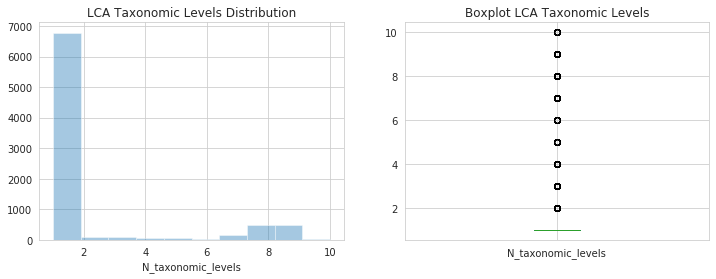

In [30]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
ax = sns.distplot(eggnog_trees_df['N_taxonomic_levels'], kde=False, bins=10)
plt.title('LCA Taxonomic Levels Distribution')
#plt.xticks(np.arange(0, 10, 1.0))

plt.subplot(1, 2, 2)
ax = eggnog_trees_df.boxplot(column='N_taxonomic_levels')
plt.title('Boxplot LCA Taxonomic Levels')

plt.show()

<span style="color:darkgreen;font-weight: bold;">
Compared to VOGDB, eggNOG has a lower resolution for the lineage.
</span>